In [6]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# データ準備

In [6]:
train = pd.read_csv('train.csv')

# 提出用にidを保持
ids = train['PassengerId']

In [7]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 棒グラフ

## matplot

In [8]:
p0 = train[train['Survived'] == 0].groupby('Pclass')['Survived'].count()
p0

Pclass
1     80
2     97
3    372
Name: Survived, dtype: int64

In [9]:
p1 = train[train['Survived'] == 1].groupby('Pclass')['Survived'].count()
p1

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [10]:
p0.index

Int64Index([1, 2, 3], dtype='int64', name='Pclass')

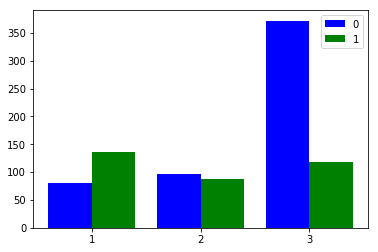

In [11]:
w = 0.4
left = p0.index
plt.bar(left, p0, color='b', width=w, label='0', align="center")
plt.bar(left + w, p1, color='g', width=w, label='1', align="center")

# 凡例を表示
plt.legend(loc="best")

# X軸の目盛りを書き換える
plt.xticks(left + w/2, left)

plt.show()

## countplot

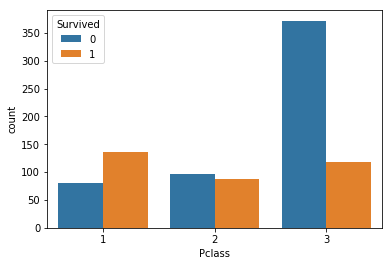

In [12]:
sns.countplot(x='Pclass',hue="Survived",data=train)

その他プロっぽく

In [18]:
train_grpby = train.groupby( ['Sex', 'Pclass'])
train_data_for_graph = train_grpby['Survived'].aggregate(sum).reset_index()
train_data_for_graph.head()

,Sex,Pclass,Survived
0,female,1,91
1,female,2,70
2,female,3,72
3,male,1,45
4,male,2,17


In [19]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


## barplot
Y軸に使われる数字は各レコードの平均値

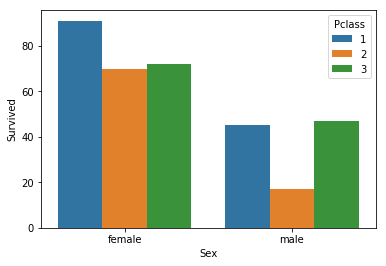

In [20]:
sns.barplot(x='Sex', y='Survived', hue= 'Pclass', data=train_data_for_graph)

## 棒グラフの意味。

> ある項目のデータを、長方形の図形を並べて表したグラフのことである。

### barplot

> It is also important to keep in mind that a bar plot shows only the mean (or other estimator) value, but in many cases it may be more informative to show the distribution of values at each level of the categorical variables. In that case, other approaches such as a box or violin plot may be more appropriate.

mean(平均値)しか表示しません。必要によって、boxplotやviolinplotを使ってください。

### countplot

> A count plot can be thought of as a histogram across a categorical, instead of quantitative, variable. The basic API and options are identical to those for barplot(), so you can compare counts across nested variables.

カテゴリ化したデータのヒストグラムとして使える。

In [7]:
tips = sns.load_dataset("tips")

In [8]:
tips.dtypes

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [27]:
tips.groupby("day").count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Thur,62,62,62,62,62,62
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76


In [28]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [29]:
tips.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


## 質問！！！！！！

In [30]:
tips.dtypes()

TypeError: 'Series' object is not callable

## Question!!!!!!!!!!

In [9]:
tips = tips.drop(tips[tips.day == 'Fri'].index).reset_index()

In [32]:
#なんでdayが使えるの?
tips.day

0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
5       Sun
6       Sun
7       Sun
8       Sun
9       Sun
10      Sun
11      Sun
12      Sun
13      Sun
14      Sun
15      Sun
16      Sun
17      Sun
18      Sun
19      Sat
20      Sat
21      Sat
22      Sat
23      Sat
24      Sat
25      Sat
26      Sat
27      Sat
28      Sat
29      Sat
       ... 
195     Sat
196     Sat
197     Sat
198     Sat
199     Sat
200     Sat
201     Sat
202     Sat
203     Sat
204     Sat
205     Sat
206     Sat
207     Sat
208     Sat
209     Sat
210     Sat
211     Sat
212     Sat
213     Sat
214     Sat
215     Sat
216     Sat
217     Sat
218     Sat
219     Sat
220     Sat
221     Sat
222     Sat
223     Sat
224    Thur
Name: day, Length: 225, dtype: category
Categories (4, object): [Thur, Fri, Sat, Sun]

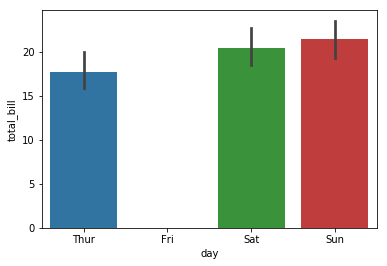

In [33]:
ax = sns.barplot(x='day', y="total_bill", data=tips)

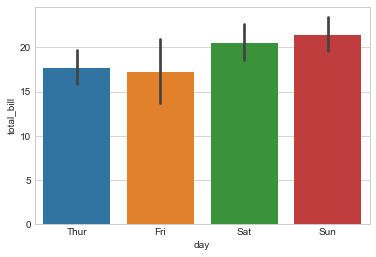

In [34]:
import seaborn as sns
sns.set_style("whitegrid")
tips = sns.load_dataset("tips")
ax = sns.barplot(x="day", y="total_bill", data=tips)

[Seaborn で件数や平均値を棒グラフで可視化する](http://pythondatascience.plavox.info/seaborn/%E6%A3%92%E3%82%B0%E3%83%A9%E3%83%95)
